<a href="https://colab.research.google.com/github/Vigneshthanga/Diabetic_Retinopathy/blob/master/DR_image_preprocessing_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Early Detection of Diabetic Retinopathy with Bayesian Deep Learning Model

##Team Members:

- Sivaranjani Kumar
- Pooja Patil
- Vignesh Kumar Thangarajan

#Diabetic Retinopathy
Diabetic retinopathy (DR), also known as diabetic eye disease, is a medical condition in which damage occurs to the retina due to diabetes mellitus. It is a leading cause of blindness. Diabetic retinopathy affects up to 80 percent of those who have had diabetes for 20 years or more. Diabetic retinopathy often has no early warning signs. Retinal (fundus) photography with manual interpretation is a widely accepted screening tool for diabetic retinopathy, with performance that can exceed that of in-person dilated eye examinations.


 Among 23 million Americans, 59 million Europeans, and as many
as 50 million Indians suffering from diabetes, the prevalence of those with DR
is estimated between 18% and 28%. Regular eye examination among these
vulnerable groups is necessary to diagnose DR at an early stage, when it can be
treated with the best prognosis. Currently, detecting DR is a time-consuming
and manual process that requires a trained clinician to examine and evaluate
digital color fundus photographs of the retina. The clinical grading process
consists of detection certain subtle features, such as microaneurysms, exudates,
intra-retinal hemorrhages and sometimes their position relative to each other
on images of the eye.

An automated tool for grading severity of diabetic retinopathy would be very useful for accerelating detection and treatment. Recently, there have been a number of attempts to utilize deep learning to diagnose DR and automatically grade diabetic retinopathy.



![Picture](https://drive.google.com/uc?id=1MDfHiG-5nVHJg3F6TgtY3nV734hcfrTI)

A clinician has rated the presence of diabetic retinopathy in each image on a scale of 0 to 4, according to the following scale:

0 - No DR

1 - Mild

2 - Moderate

3 - Severe

4 - Proliferative DR

![alt text](https://drive.google.com/uc?id=1R0Qigh2aj-YtBErYfHgQEVHwFBFNC_lK)

##Importing necessary libraries..

In [0]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'Deep_Learning'

Mounted at /content/gdrive


In [0]:
csv_train = base_dir + '/aptos2019-blindness-detection/train.csv'
csv_test = base_dir + '/aptos2019-blindness-detection/test.csv'

##Reading from CSV file..

In [0]:
train_df = pd.read_csv(csv_train)
test_df = pd.read_csv(csv_test)

In [0]:
test_df.shape

(1928, 1)

In [0]:
test_df.head(2)

id_code
0  0005cfc8afb6
1  003f0afdcd15

In [0]:
train_df.shape

(3662, 2)

In [0]:
train_df.head(2)

id_code  diagnosis
0  000c1434d8d7          2
1  001639a390f0          4

In [0]:
train_df.dtypes

id_code      object
diagnosis     int64
dtype: object

In [0]:
train_df['diagnosis'].value_counts()

0    1805
2     999
1     370
4     295
3     193
Name: diagnosis, dtype: int64

In [0]:
train_images = base_dir + '/aptos2019-blindness-detection'
test_images = base_dir + '/aptos2019-blindness-detection'

##Visualizing Diagnosis column from CSV file

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


{0, 1, 2, 3, 4}


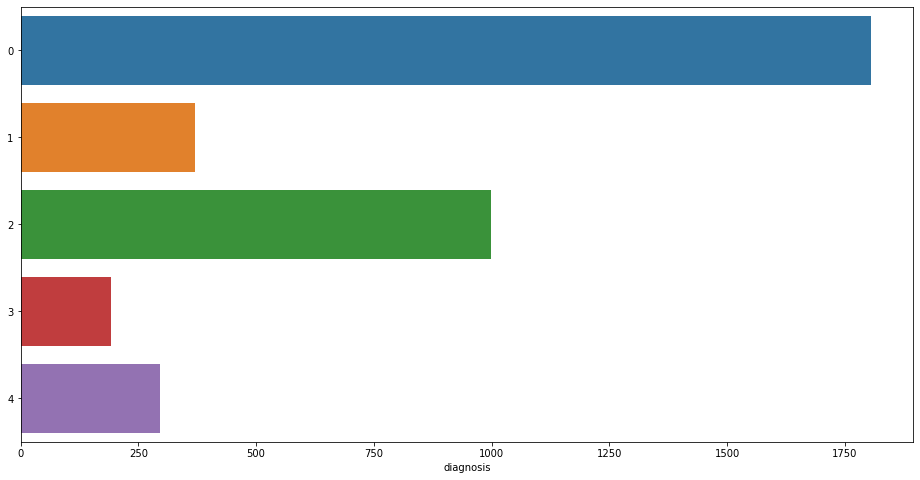

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

label_all = train_df['diagnosis']
label_unique = set(label_all)
print(label_unique)
label_s = pd.Series(label_all).value_counts()
fig, ax = plt.subplots(figsize=(16, 8))
sns.barplot(x=label_s, y=label_s.index, orient='h')

In [0]:
#train_df.max()
train_df[:3]


id_code  diagnosis
0  000c1434d8d7          2
1  001639a390f0          4
2  0024cdab0c1e          1

##Visualizing actual DR images from file

Most of the images are improper in shape. So, we need to resize them to one size. Most of our model accepts input pixel size of 224* 224 *3

000c1434d8d7 2 /content/gdrive/My Drive/Deep_Learning/eye_images/train_images/000c1434d8d7.png
000c1434d8d7.png
001639a390f0 4 /content/gdrive/My Drive/Deep_Learning/eye_images/train_images/001639a390f0.png
001639a390f0.png
0024cdab0c1e 1 /content/gdrive/My Drive/Deep_Learning/eye_images/train_images/0024cdab0c1e.png
0024cdab0c1e.png
002c21358ce6 0 /content/gdrive/My Drive/Deep_Learning/eye_images/train_images/002c21358ce6.png
002c21358ce6.png
005b95c28852 0 /content/gdrive/My Drive/Deep_Learning/eye_images/train_images/005b95c28852.png
005b95c28852.png
0083ee8054ee 4 /content/gdrive/My Drive/Deep_Learning/eye_images/train_images/0083ee8054ee.png
0083ee8054ee.png
0097f532ac9f 0 /content/gdrive/My Drive/Deep_Learning/eye_images/train_images/0097f532ac9f.png
0097f532ac9f.png
00a8624548a9 2 /content/gdrive/My Drive/Deep_Learning/eye_images/train_images/00a8624548a9.png
00a8624548a9.png
00b74780d31d 2 /content/gdrive/My Drive/Deep_Learning/eye_images/train_images/00b74780d31d.png
00b74780d

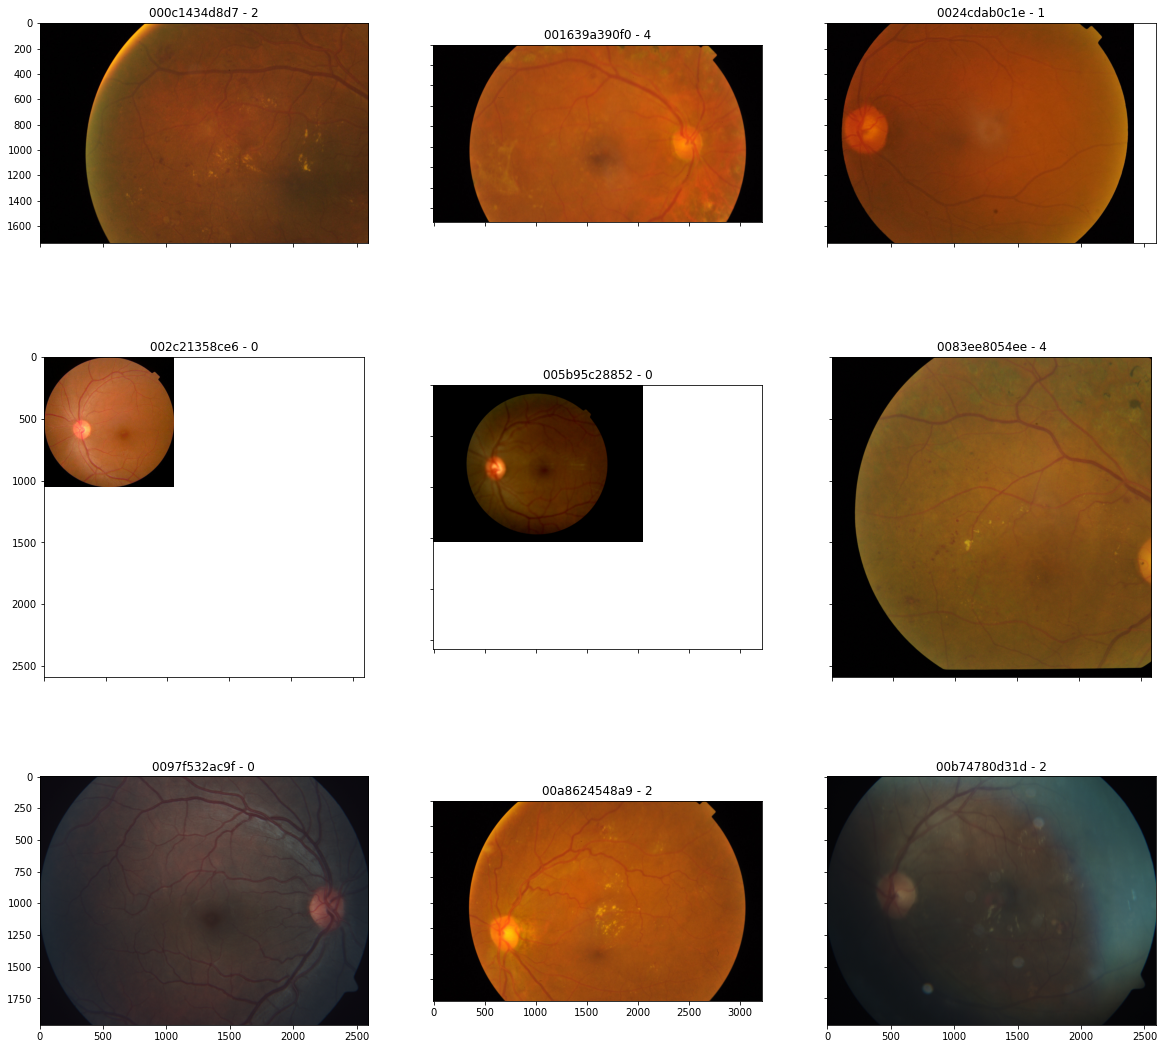

In [0]:
import cv2

new_style = {'grid': False}
plt.rc('axes', **new_style)
_, ax = plt.subplots(3, 3, sharex='col', sharey='row', figsize=(20, 20))
valid = 0
tot = 0
for f, l in train_df[:9].values:
    tot += 1
    print(f,l,"/content/gdrive/My Drive/Deep_Learning/eye_images/train_images/{}.png".format(f))
    try :
      img = cv2.imread('/content/gdrive/My Drive/Deep_Learning/eye_images/train_images/{}.png'.format(f))
      ax[valid // 3, valid % 3].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
      ax[valid // 3, valid % 3].set_title('{} - {}'.format(f, l))
      valid += 1
      print('{}.png'.format(f))
    except :
      continue
print("Total Images", tot, "Processed Images :", valid)
plt.show()

##Main function to read images from file and performs different transformation on the images

In [0]:
from google.colab.patches import cv2_imshow
import os.path
from os import path
# dataframe - input data frame
# count - integer, a number corresponding to row numer
# view - True for view image on plot
# IMG_SIZE
# onlyOne = True means just fetch one row
#class Retinal Processing

def applyGrayConversion(image,IMG_SIZE=224) :           #Apply Gray conversion on the image
  image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)  
  image = crop_image_from_gray(image)
  image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
  return image

def resize_image(image, IMG_SIZE=224):                  #Resize the image 
  image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
  return image

def applyGaussian_gray(image, sigmaX=10,IMG_SIZE=224) : #Apply Gaussian Blur on the Gray images
  image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)  
  image = crop_image_from_gray(image)
  image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
  image=cv2.addWeighted ( image,4, cv2.GaussianBlur( image , (0,0) , sigmaX) ,-4 ,128)
  return image  

def applyGaussian_color(image, sigmaX=10,IMG_SIZE=224) : #Apply Gaussian Blur on the original image
  image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)  
  image = crop_image_from_gray(image)
  image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
  image=cv2.addWeighted ( image,4, cv2.GaussianBlur( image , (0,0) , sigmaX) ,-4 ,128)
  return image  


def addImage(ax, image, row, column, f):       #For Visualization of images
  #print(row,column)
  label = 'no_label'
  if len(f) > 1 :
    label = f[1]
  #cv2_imshow(image)
  # without gray option, even gray colorscape image is shown in somewhat green color
  #ax[row, column % 5].imshow(image, cmap='gray')
  ax[row, column % 5].imshow(image, cmap='gray')
  ax[row, column % 5].set_title('{} - {}'.format(f[0], label))


def crop_image_from_gray(img,tol=7):      #Cropping the image to remove noise from the data 
    if img.ndim ==2:
        mask = img>tol
        return img[np.ix_(mask.any(1),mask.any(0))]
    elif img.ndim==3:
        gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        mask = gray_img>tol
        
        check_shape = img[:,:,0][np.ix_(mask.any(1),mask.any(0))].shape[0]
        if (check_shape == 0): # image is too dark so that we crop out everything,
            return img # return original image
        else:
            img1=img[:,:,0][np.ix_(mask.any(1),mask.any(0))]
            img2=img[:,:,1][np.ix_(mask.any(1),mask.any(0))]
            img3=img[:,:,2][np.ix_(mask.any(1),mask.any(0))]
    #         print(img1.shape,img2.shape,img3.shape)
            img = np.stack([img1,img2,img3],axis=-1)
    #         print(img.shape)
        return img




def processImages(dataframe,count=None,view=False,IMG_SIZE=32,onlyOne=False,ax=None,img_process=applyGrayConversion) :
  fail =[]
  valid=[]
  total=0
  invalid_file = []
  inp = dataframe
  if count != None :
    inp = dataframe[:count]
  if onlyOne :
    inp = dataframe.loc[[count]]  
  if not img_process :
    img_processs = []  
  x_train = [] 
  for f in inp.values:
    #print(f)
    total += 1
    file_path = '/content/gdrive/My Drive/Deep_Learning/eye_images/train_images/{}.png'.format(f[0])
    if not path.exists(file_path) :
      invalid_file.append(file_path)
      continue  
    try :
      image = cv2.imread(file_path)      #Read Images from drive using OpenCV Library - converts image to BGR format by default
      if image is not None :
        image = img_process(image)
        # image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
        if view :  
          lth = len(valid)
          #print("viewimage : ",f[1],lth)
          addImage(ax,image,f[1],lth,f)
        valid.append(file_path)
        x_train.append(image)
      else :
        fail.append(file_path)
    except Exception as e:
      print(e)
      fail.append(file_path)
      continue
  return x_train  

  if len(invalid_file) :
    print("Invalid file path",len(invalid_file)) 
  if len(fail) :
    print("Fail ", len(fail))
  print("Total ", total)



##Visualizing the eye images after reading through OPenCV Library, by default the images are converted to BGR format when read using OpenCV library..

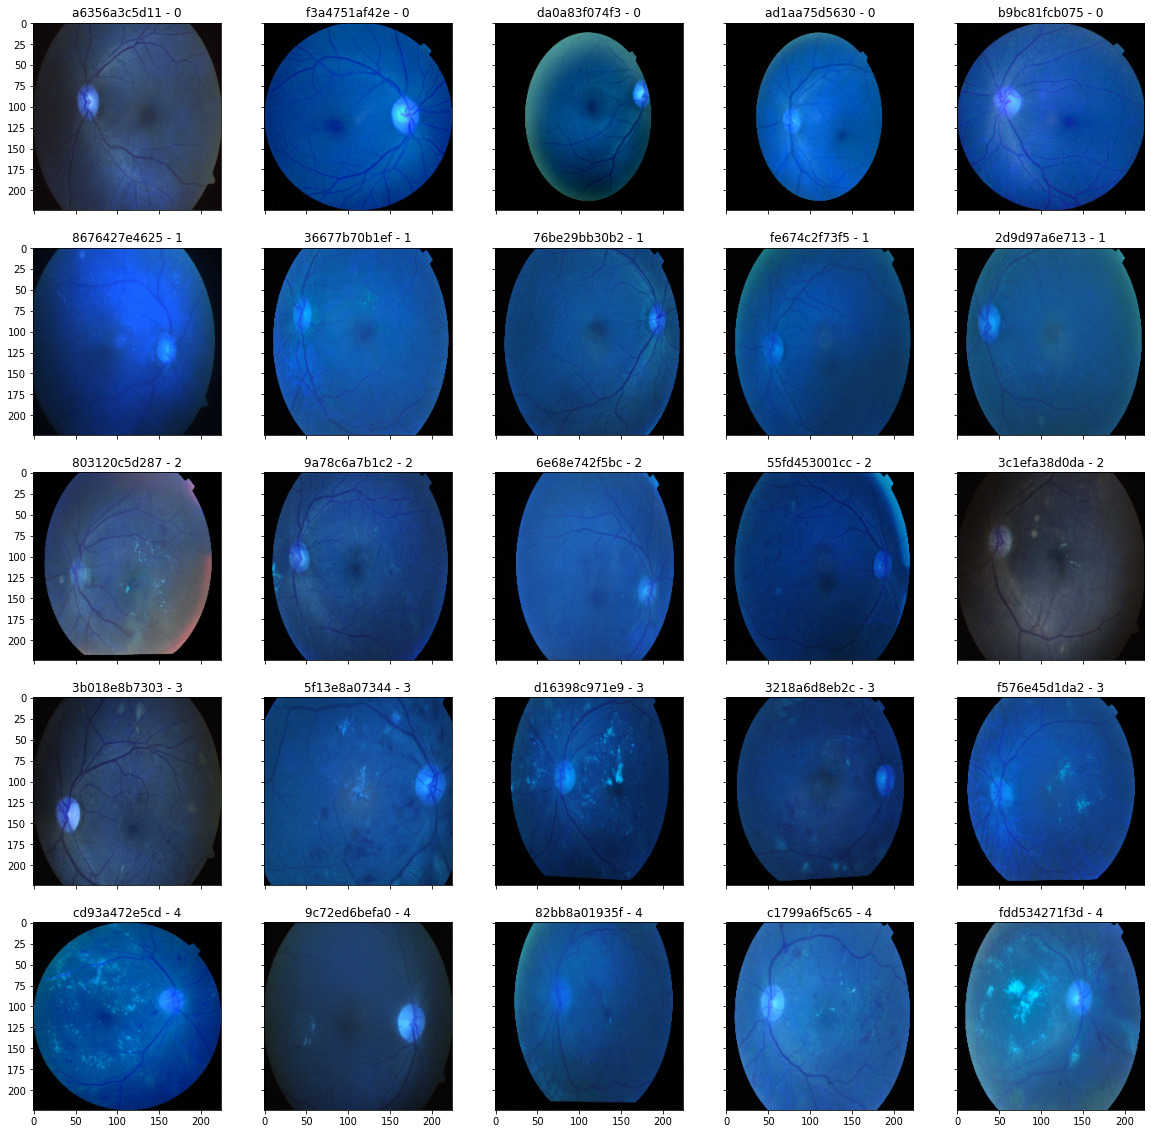

In [0]:
new_style = {'grid': False}
plt.rc('axes', **new_style)
_, ax = plt.subplots(5, 5, sharex='col', sharey='row', figsize=(20, 20))
for label in sorted(train_df['diagnosis'].unique()) :
  temp = train_df.loc[train_df['diagnosis'] == label]
  temp = temp.sample(5,random_state=1)
  #print(temp.shape)
  processImages(dataframe=temp,view=True,IMG_SIZE=224,ax=ax,img_process=resize_image)
plt.show()

##Visualizing the images after appplying Gray Conversion on top of above image format...

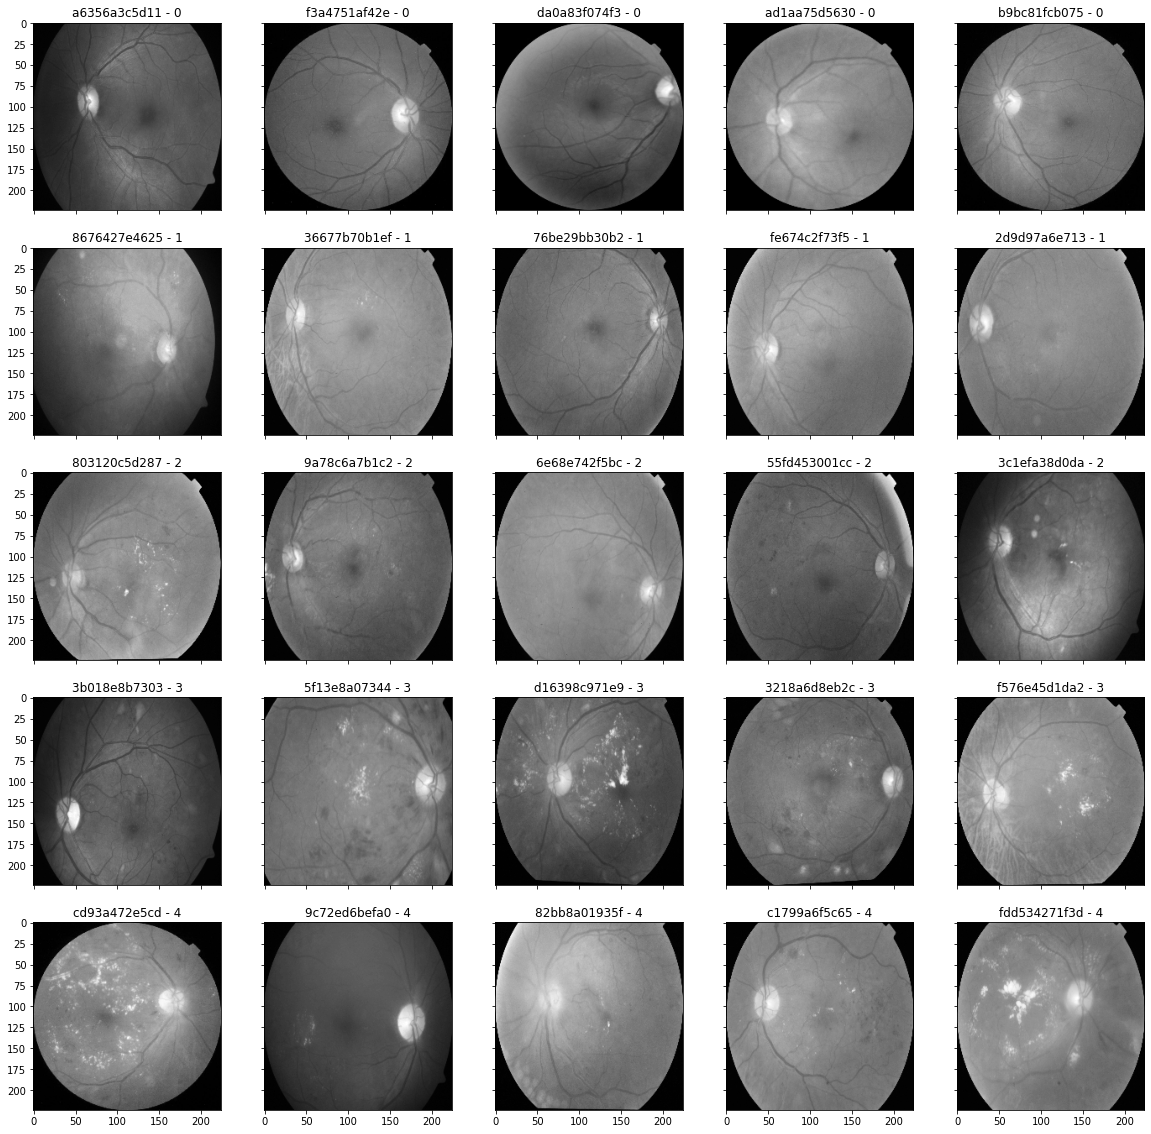

In [0]:
new_style = {'grid': False}
plt.rc('axes', **new_style)
_, ax = plt.subplots(5, 5, sharex='col', sharey='row', figsize=(20, 20))
for label in sorted(train_df['diagnosis'].unique()) :
  temp = train_df.loc[train_df['diagnosis'] == label]
  temp = temp.sample(5,random_state=1)
  #print(temp.shape)
  processImages(dataframe=temp,view=True,IMG_SIZE=224,ax=ax,img_process=applyGrayConversion)
plt.show()

##Visualizing the images after applying Gaussin Blur on top of the gray converted images..

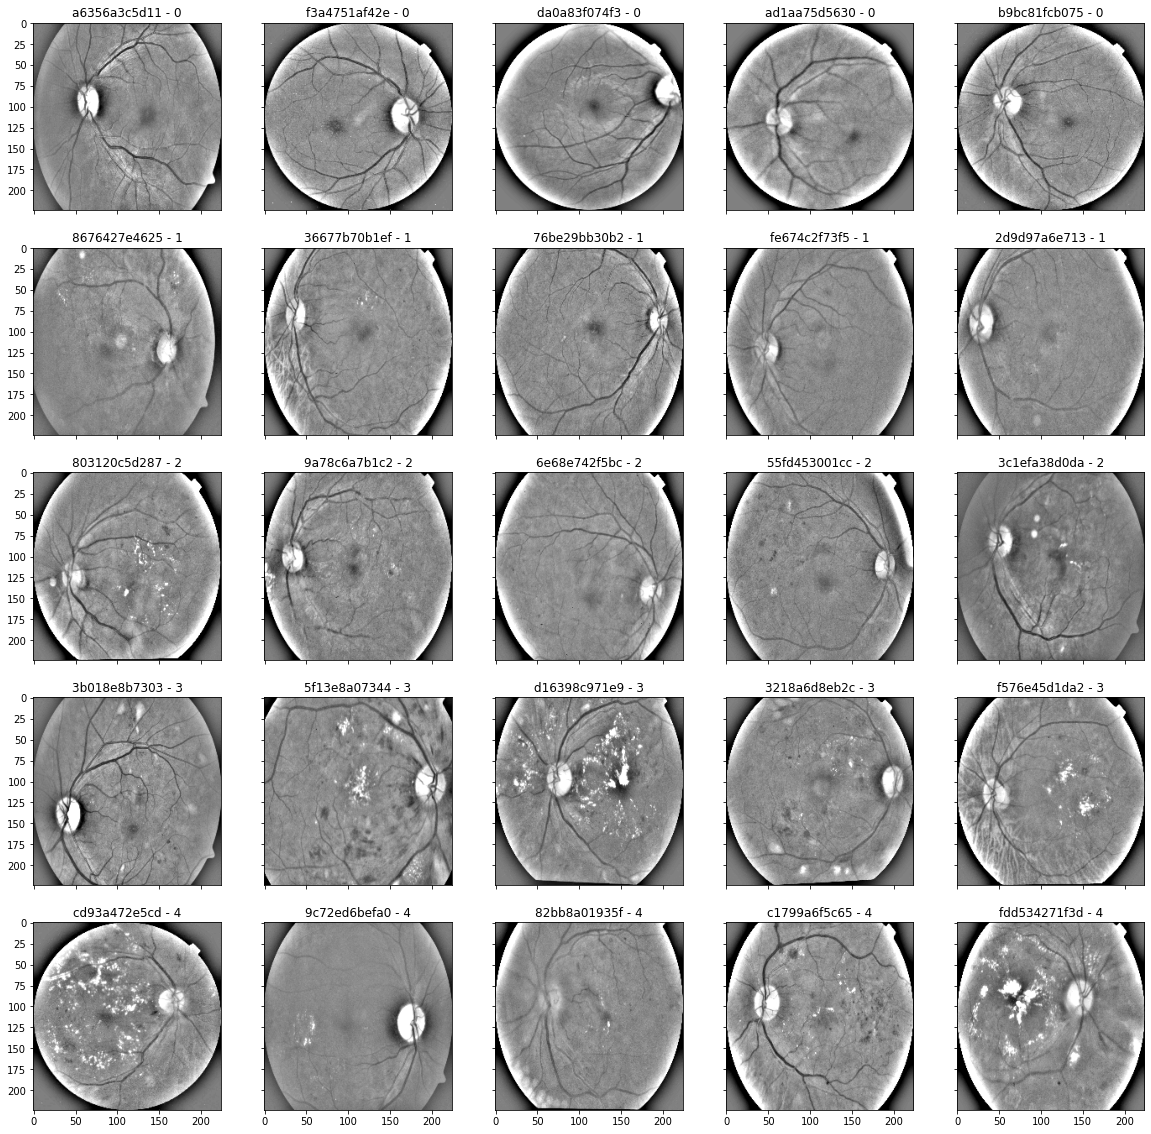

In [0]:
new_style = {'grid': False}
plt.rc('axes', **new_style)
_, ax = plt.subplots(5, 5, sharex='col', sharey='row', figsize=(20, 20))
for label in sorted(train_df['diagnosis'].unique()) :
  temp = train_df.loc[train_df['diagnosis'] == label]
  temp = temp.sample(5,random_state=1)
  #print(temp.shape)
  processImages(dataframe=temp,view=True,IMG_SIZE=224,ax=ax,img_process=applyGaussian_gray)
plt.show()

##Visualizing the images after applying Gaussian Blur on the original images..

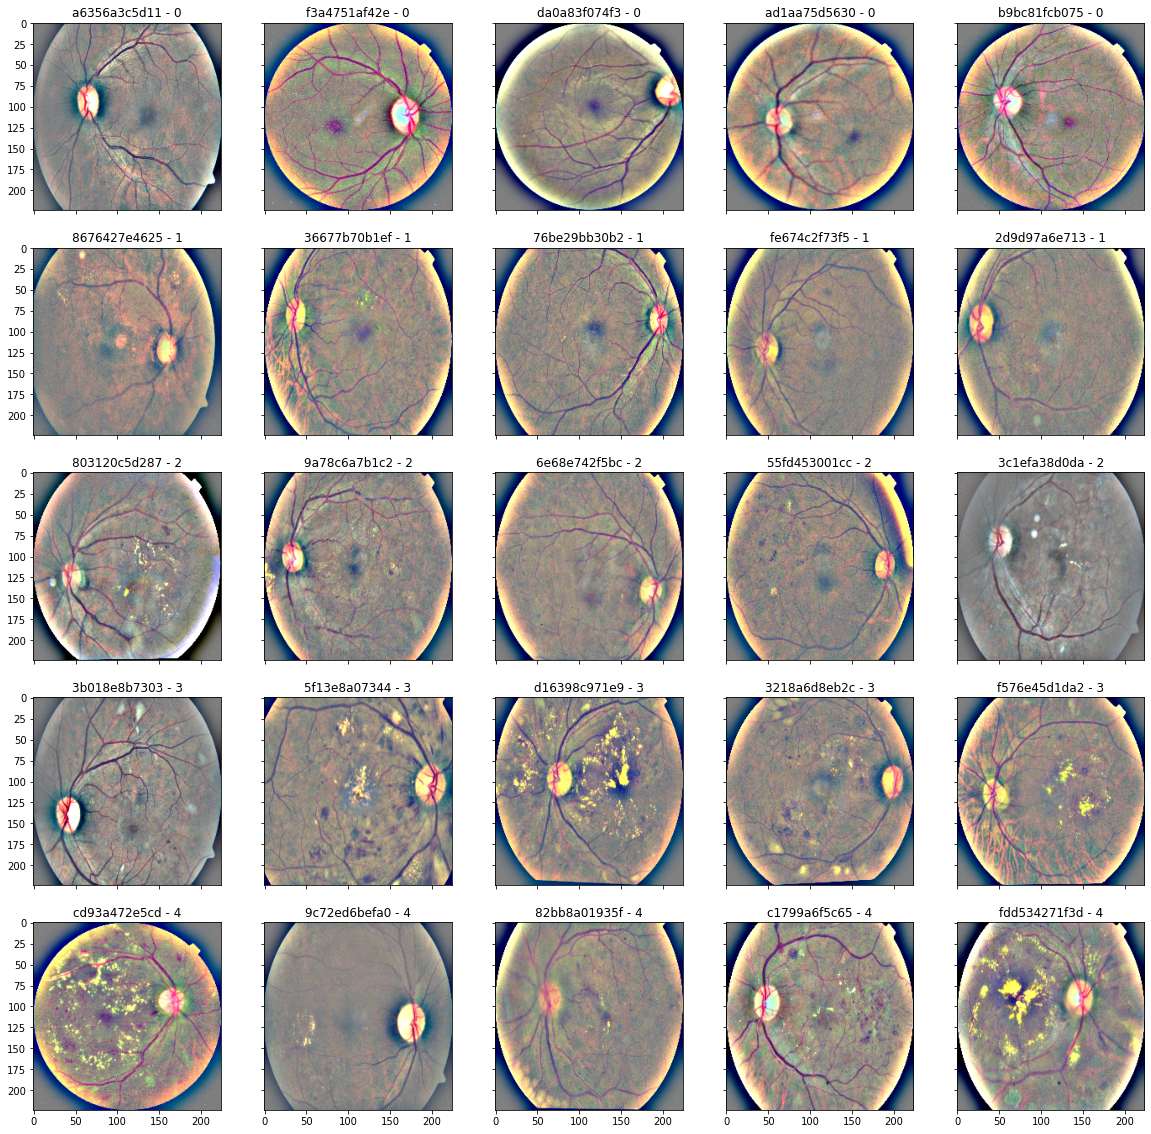

In [0]:
new_style = {'grid': False}
plt.rc('axes', **new_style)
_, ax = plt.subplots(5, 5, sharex='col', sharey='row', figsize=(20, 20))
for label in sorted(train_df['diagnosis'].unique()) :
  temp = train_df.loc[train_df['diagnosis'] == label]
  temp = temp.sample(5,random_state=1)
  #print(temp.shape)
  processImages(dataframe=temp,view=True,IMG_SIZE=224,ax=ax,img_process=applyGaussian_color)
plt.show()

##Images are stored in x_train and labels are stored in y_train while applying Gaussian Blur on the images. 

In [0]:
# from tqdm import tqdm
# x_train = []
# y_train = []

# #for row in tqdm(range(len(train_df.values)), miniters=500):
# x_train = processImages(dataframe=train_df,IMG_SIZE=224,img_process=applyGaussian_color)
# y_train = train_df['diagnosis'].values
# #    x_train.append(img)
# #    y_train.append(label)
    
# y_train = np.array(y_train, np.uint8)
# x_train = np.array(x_train, np.float16) / 255



##Writing image data into H5 format after applying Gaussina Blur on images

In [0]:
import h5py
def writeAsH5(x_train,y_train,dest_file) :
  x_h5_train = 'x_train'
  y_h5_train = 'y_train'
  num = x_train.shape[0]
  sample = num
  data_shape = (num, 224 * 224 * 3)
  if path.exists(dest_file) :
    print("File exists. Please remove the destination file to create a new one or give a different name")
    print(dest_file)
  else :
    print("File does not exist : " + dest_file + ".Creating a new file using mode 'w'")
    with h5py.File(dest_file, 'w') as f:
      f.create_dataset(x_h5_train, data_shape, np.float32)
      for i in range(sample):
        img = x_train[i]
        img = img.ravel()
        #img[None] makes it a proper array instead of rank 1 array
        f[x_h5_train][i, ...] = img[None]
    with h5py.File(dest_file, 'a') as f:
      f.create_dataset(y_h5_train, (num,), np.int8)
      for i in range(sample):
        img = y_train[i]
        f[y_h5_train][i,...] = img

In [0]:
dest_file = '/content/gdrive/My Drive/Deep_Learning/eye_images/gaussian_color_224.h5'
# writeAsH5(x_train, y_train, dest_file)  #This will call the function to write into a h5 file

In [0]:
# y_train = train_df['diagnosis'].values
# print(np.unique(y_train))
# sam_file ='/content/gdrive/My Drive/Deep_Learning/eye_images/gaussian_color_y_train.h5'
# test = 3662
# with h5py.File(sam_file, 'w') as f:
#       f.create_dataset("y_train", (test,), np.int8)
#       for i in range(test):
#         img = y_train[i]
#         f["y_train"][i,...] = img       

##Read label column alone from h5 file and plot

In [0]:
with h5py.File(dest_file, "r") as f:
  print(list(f.keys()))
  y = f["y_train"][:]
  print('y shape =', y.shape)

row = 1
label = y[row]
print("label : ", label)    
print(y)  

['x_train', 'y_train']
y shape = (3662,)
label :  4
[2 4 1 ... 2 0 2]


##Read from a file and visualizing one image

['x_train', 'y_train']
x shape = (3662, 150528)
y shape = (3662,)
(224, 224, 3)
<class 'numpy.ndarray'>
label :  0


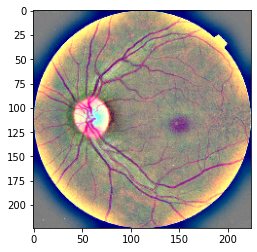

In [0]:
import h5py
dest_file = '/content/gdrive/My Drive/Deep_Learning/eye_images/gaussian_color_224.h5'
with h5py.File(dest_file, "r") as f:
  print(list(f.keys()))
  x = f["x_train"][:]
  y = f["y_train"][:]
  print('x shape =', x.shape)
  print('y shape =', y.shape)

row = 10
image = x[row]
label = y[row]
image = (x[row]).reshape(224, 224, 3)
plt.imshow(image) 
print(image.shape)
print(type(image))
print("label : ", label)

In [0]:
import numpy as np
np.unique(y)

array([0, 1, 2, 3, 4], dtype=int8)

In [0]:
type(x)

numpy.ndarray

In [0]:
x= np.reshape(x,(3662,224,224,3))

In [0]:
x.shape

(3662, 224, 224, 3)

##Splitting the image data into train, test and validation dataset

In [0]:
from sklearn.model_selection import train_test_split

x_train_full, x_test, y_train_full, y_test = train_test_split(x, y, test_size=0.10, random_state=42)

x_train, x_valid, y_train, y_valid = train_test_split(x_train_full, y_train_full, test_size=0.20, random_state=42)

In [0]:
x_train.shape

(2636, 224, 224, 3)

In [0]:
x_valid.shape

(659, 224, 224, 3)

In [0]:
x_test.shape

(367, 224, 224, 3)

In [0]:
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Flatten, BatchNormalization, MaxPooling2D, Conv2D
from keras.callbacks import ModelCheckpoint, EarlyStopping

Using TensorFlow backend.
